<a href="https://colab.research.google.com/github/paritoshkc/Computer-Vision-Project/blob/master/CV_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


COMPUTER VISION ASSIGNMENT 2

#Loading the keras mnist Dataset and filtering images of 1 digit 
    

*   [References used for loading Keras MNIST dataset]
    (https://medium.com/@ashok.tankala/build-the-mnist-model-with-your-own-handwritten-digits-using-tensorflow-keras-and-python-f8ec9f871fd3)
*   Total images available are 70000 with 60000 are set aside for training and 10000 for test images. 
* reshaping the train images to dimensions of 28x28 
* Filter the values based on the labels defined for each digit in *y_train* to create filters that can be used to find them in *X_train* and *X_test*
* I have filtered the images for finding digit "1" . To understand the amount of data available we can print the shape to get the total number of images in X_train.




In [244]:
from keras.datasets import mnist
from PIL import Image
from numpy import *
from matplotlib import pyplot as plt
from pylab import *

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)
num_pixels = 784

def get_filttered_data(img_digit):
  train_filter = np.where(y_train == img_digit )
  test_filter = np.where(y_test == img_digit )

  X_train_digits=X_train[train_filter]
  X_test_digits=X_test[test_filter]
  X_train_digits=X_train_digits[X_train_digits.shape[0]-500:]
  return X_train_digits,X_test_digits

X_train_digit,X_test_digit=get_filttered_data(5)



print(X_train_digit.shape)


(500, 784)


# 2.a Compute and display 
    1.Mean image
      There are many ways to find the mean image for a set of images. Here are some of them which I explored :-


*   Taking mean of the uint8 array formed after applying filter and converting it into array and displaying it. 

*   Using Sklearn PCA function to find the mean of image after fitting it with desired number of components from the image. [Sklearn Documentation for PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)




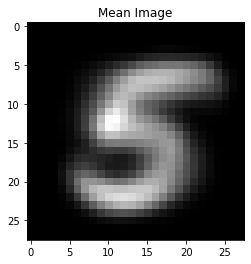

In [245]:
from sklearn.decomposition import PCA



def show_image(image,msg):
  figure(figsize=(4,4),constrained_layout=False)
  plt.title(msg)
  plt.imshow(image,cmap =plt.cm.gray)
  plt.show()

#****uncomment to display this version****

# mean_img=X_train_digit.mean(axis=0)
# reshaped_mean_image=mean_img.reshape(28,28)
# show_image(np.asarray(reshaped_mean_image))



pca = PCA(n_components=10)         #using all features of the image
pca.fit(X_train_digit)              #using all the images in the train data to fit in the PCA model.
digit_mean=pca.mean_.reshape(28,28)
show_image(digit_mean,'Mean Image')

principal_components=pca.components_


    2.Display first two principal components which have the highest eigenvalues


*   Using Sklearn's inbuild function we can find the principal components which are returned by the library in the descending order of the eigen values.
*   Displaying the principal components corresponding to the highest eigen values.



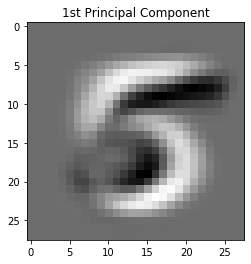

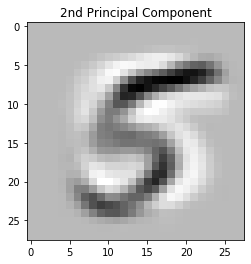

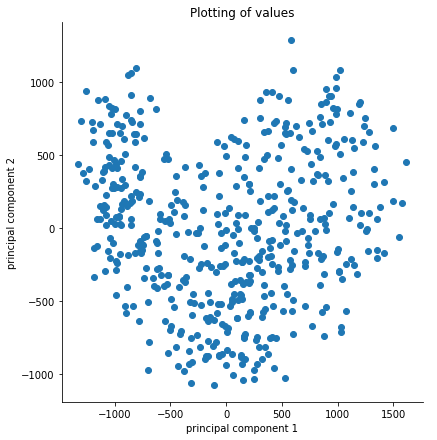

In [246]:
import seaborn as sn
import pandas as pd
pca = PCA(n_components=2)         #using all features of the image
principalComponents=pca.fit_transform(X_train_digit)  #taking the images from the mnist dataset
show_image(pca.components_[0].reshape(28,28),'1st Principal Component')
show_image(pca.components_[1].reshape(28,28),'2nd Principal Component')


principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

sn.FacetGrid(principalDf, height=6).map(plt.scatter, 'principal component 1', 'principal component 2').add_legend()
plt.title('Plotting of values')
plt.show()

# 2b Compute and Display Reconstructed test image using mean image and :-


1.   10 Principal Component associated with 10 eigen values 
2.   50 Principal Component associated with 50 eigen values

 [*Programming Computer Vision with Python*](https://www.oreilly.com/library/view/programming-computer-vision/9781449341916/) by Jan Erik Solem PCA is defined as -
 Principal Component Analysis (PCA) is a useful technique for dimensionality reduction and is optimal in the sense that it represents the variability of the training data with as few dimensions as possible





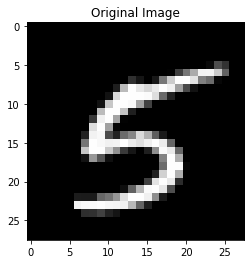

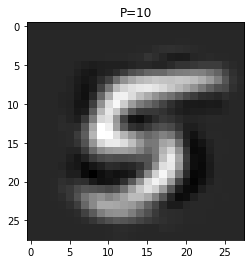

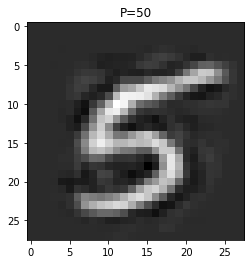

In [247]:

show_image(X_test_digit[4].reshape(28,28),'Original Image')

pca = PCA(n_components=10)
lower_dimensional_data = pca.fit_transform(X_train_digit)
test_lower_dimensional_data_10 = pca.transform(X_test_digit)
approximation = pca.inverse_transform(test_lower_dimensional_data_10)
show_image(approximation[4].reshape(28,28),'P=10')

pca = PCA(n_components=50)
lower_dimensional_data = pca.fit_transform(X_train_digit)
test_lower_dimensional_data_50 = pca.transform(X_test_digit)
approximation = pca.inverse_transform(test_lower_dimensional_data_50)
show_image(approximation[4].reshape(28,28),'P=50')

# SSD and DFFS
    For DFFS we need to evaluate the PCA with components that covers almost all the features in the image set. 
    To determince that we perform the pca for all the features and plot it on the graph to check which can be selected as the component value

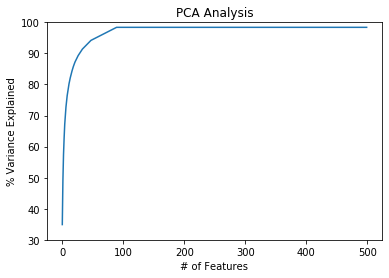

In [248]:
X_train_digit,X_test_digit=get_filttered_data(1) #get images of digit 1
pca = PCA(n_components=500)
pca.fit(X_train_digit)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

By ploting the  *explained_variance_ratio_* we determine the percentage of variance explained. This can be used to determine the variables that are required to be used for SSD and DFFS

# SSD (Sum of Square Difference)
In the research paper   " [An Overview of Various Template Matching
Methodologies in Image Processing](https://www.ijcaonline.org/archives/volume153/number10/swaroop-2016-ijca-912165.pdf) " SSD can be infered as the measure of variation or deviation from the mean can be represented by sum of squares.It is calculated as a summations of the squares of the variations from the mean

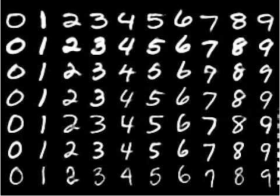

(500, 784)


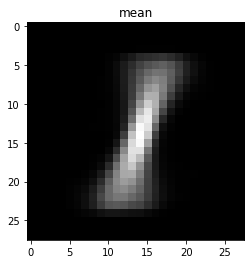

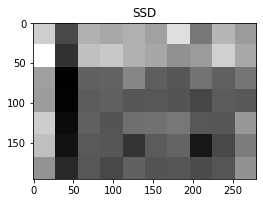

In [249]:
import cv2
from google.colab.patches import cv2_imshow
import seaborn as sns

#img_f_dffs=np.zeros((28*7,28*10))
img_f_mean=np.zeros((28*7,28*10))

path='/content/drive/My Drive/Colab Notebooks/test_Image.PNG'

def get_grey_Image(path):
  image = cv2.imread(path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  width = 280
  height = 28*7
  dim = (width, height)
  resized_gray = cv2.resize(gray, dim, interpolation = cv2.INTER_AREA)
  return resized_gray

    
def ssd_sw(image, mean_img):
  stepSize = 28
  (w_width, w_height) = (28,28) # window size
  for x in range(0, image.shape[0]  , stepSize):
    for y in range(0, image.shape[1] , stepSize):
        window = image[x:x + w_width, y:y + w_height]
        img_f_mean[x:x + w_width, y:y + w_height]=((window-mean_img)**2).sum(axis=-1).sum(axis=-1)


img=get_grey_Image(path)
cv2_imshow(img) #displaying the original image


X_train_digit,X_test_digit=get_filttered_data(1) #get images of digit 1
print(X_train_digit.shape)


pca = PCA(n_components=100) #setting n_components based on the values that was infered from the plotted graph
pca.fit(X_train_digit)


digit_mean=pca.mean_.reshape(28,28) #Mean of all the images
show_image(digit_mean,'mean')

ssd_sw(img, digit_mean) # calling the function to get an array after the pixel maniplation
show_image(img_f_mean,'SSD')


The heat map is generated by moving a window frame across the image and substracting the mean image from the window image(part of test image) and storing the values in another array.


#DFFS - Distance From Feature Space
In the research paper of [Facial Feature Extraction and Principal Component Analysis for Face Detection in Color Images](http://doras.dcu.ie/285/1/lncs_3212.pdf) DFFS is defined as substraction of ssd with sum of all prinicipal components.

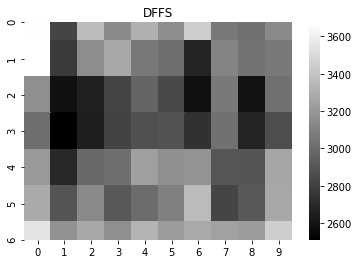

In [250]:
img_dffs=[]


def sliding_window_dffs(image, mean_img,reconstructed):
  stepSize = 28
  (w_width, w_height) = (28,28) # window size
  #show_image(mean_img,'dffs_mean')
  for x in range(0, image.shape[0]  , stepSize):
    for y in range(0, image.shape[1] , stepSize):
        window = image[x:x + w_width, y:y + w_height]
        img_dffs.append(np.sqrt(np.sum(np.square(np.subtract(np.subtract(window,mean_img),reconstructed)))).sum(axis=-1).sum(axis=-1))


pca_components=pca.components_ #extracting all the pca components
pca_component_sum=np.sum(np.square(pca_components)) #summation of the squares

sliding_window_dffs_test(img,digit_mean,approximation[0].reshape(28,28))
plt.figure()
ax = plt.axes()
sns.heatmap(np.array(img_dffs).reshape(7,10),cmap='gray',ax=ax)
ax.set_title('DFFS')
plt.show()




The heat map is generated by moving a window frame across the image and substracting the reconstrcuted image from the substraction of window image(part of test image) and mean.The values are stored in another array.

# Evaluation of DFFS and SSD
For evaluation of the methods, I took a randome image from the train dataset and ploted the heatmap.
Both the heatmap suggests that the mean image plays an important role for getting an accurate prediction. 
SSD heatmap shows that the digit 1 is displayed more clearly than when passed the mean. The mean image of digit 1 shows lines in many angles which when used for SSD or DFFS doesnt allow the window to be detected.
When the mean is clear ( as shown below by assuming a single image as the mean) the heatmaps can clearly make a difference.

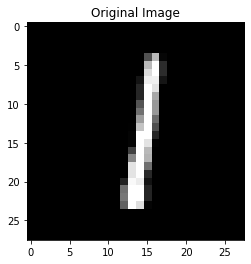

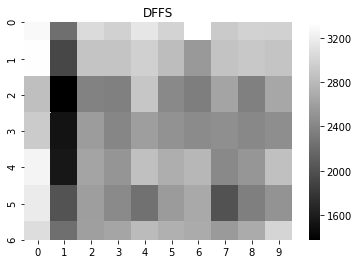

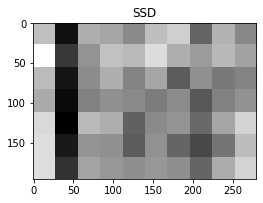

In [251]:
img_dffs=[]
show_image(X_train_digit[3].reshape(28,28),'Original Image')

#dffs
sliding_window_dffs(img,digit_mean,X_train_digit[3].reshape(28,28))
plt.figure()
ax = plt.axes()
sns.heatmap(np.array(img_dffs).reshape(7,10),cmap='gray',ax=ax)
ax.set_title('DFFS')
plt.show()

#ssd 
img_f_mean=np.zeros((28*7,28*10))
ssd_sw(img, X_train_digit[3].reshape(28,28)) # calling the function to get an array after the pixel maniplation
show_image(img_f_mean,'SSD')